# Matthew Peetz
# Regis University
# MSDS 620 Summer 8 Week 1 2023
# Final Project

The dataset Yeast, donated on 8/31/1996 to the UCI Machine Learning Repository < Nakai,Kenta. (1996). Yeast. UCI Machine Learning Repository. https://doi.org/10.24432/C5KG68. > Will be used to demonstrate the Date Collection and Preparation skills learning in MSDS 620. The data set contains non-numeric information on the localization site of proteins. The data set includes Protein Sequence names, followed by 8 attributes of the protein and the protein localization site. After cleaning up the data the focus will be on predicting the protein binding site using the features provided. The initial data set has 1,484 instances with 8 attributes. It is real world data.

The data set will first be cleaned up for use in building a classification model.

The data will be divided in to train and test sets, run through several classification models, and evaluated for the accuracy of the model.

# Analysis Question: Can protein attributes be used to construct a model to predict their localization sites?

Protein localization is important in both the study of disease and drug production. Yeast (saccharomyces cerevisia) are often used in the study of protein expression, binding, localization, etc. If the localization site can be predicted it would lead to faster and better drugs to treat diseases such as cancer.

Huh, WK., Falvo, J., Gerke, L. et al. Global analysis of protein localization in budding yeast. Nature 425, 686–691 (2003). https://doi.org/10.1038/nature02026

In [1]:
# Loading in the data set
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

colnames=['Sequence Name', 'MCG', 'GVH', 'Alom_Mem_Span', 'Amino_Acid_Content', 
          'HDEL_Substring_Presence', 'Preox_CTerminus', 'Vaculor_AA_Content', 
          'Nuc_Localization', 'Class']
# col names from data file

df = pd.read_csv('data_finalproject/yeast.csv', delim_whitespace=True, names=colnames, header=None) # The data is seperated with white spaces, not commas
df.head()

,Sequence Name,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [2]:
# Viewing the classes
df.groupby('Class').count()

,Sequence Name,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization
Class,,,,,,,,,
CYT,463,463,463,463,463,463,463,463,463
ERL,5,5,5,5,5,5,5,5,5
EXC,35,35,35,35,35,35,35,35,35
ME1,44,44,44,44,44,44,44,44,44
ME2,51,51,51,51,51,51,51,51,51
ME3,163,163,163,163,163,163,163,163,163
MIT,244,244,244,244,244,244,244,244,244
NUC,429,429,429,429,429,429,429,429,429
POX,20,20,20,20,20,20,20,20,20


## Step 1: Cleaning the Data

In [3]:
# Looking at the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sequence Name            1484 non-null   object 
 1   MCG                      1484 non-null   float64
 2   GVH                      1484 non-null   float64
 3   Alom_Mem_Span            1484 non-null   float64
 4   Amino_Acid_Content       1484 non-null   float64
 5   HDEL_Substring_Presence  1484 non-null   float64
 6   Preox_CTerminus          1484 non-null   float64
 7   Vaculor_AA_Content       1484 non-null   float64
 8   Nuc_Localization         1484 non-null   float64
 9   Class                    1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


The cleaning for this dataset is minimal.
* There are no missing values
* The data types for the model are floats, the sequence name is an object, as is the class.
* The data is already in long format (there are not variables being used as columns)

The index will be set as the sequence name.

In [4]:
df = df.set_index('Sequence Name')

What if there were missing values? Here is an example of how they could be fixed. (This is the original data set with a few NaN's added at random)

In [5]:
colnames=['Sequence Name', 'MCG', 'GVH', 'Alom Mem Span', 'Amino Acid Content', 
          'HDEL Substring Presence', 'Preox C-Terminus', 'Vaculor AA Content', 
          'Nuc Localization', 'Class']
# col names from data file

missing_df = pd.read_csv('data_finalproject/yeast_missing.csv', delim_whitespace=True, names=colnames, header=None) # The data is seperated with white spaces, not commas
missing_df.head()

,Sequence Name,MCG,GVH,Alom Mem Span,Amino Acid Content,HDEL Substring Presence,Preox C-Terminus,Vaculor AA Content,Nuc Localization,Class
0,ADT1_YEAST,NaN,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,NaN,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


Highlighting the missing values in the data frame

In [ ]:
# using the built in style feature for missing values
# missing_df.style.highlight_null(color='yellow')

# NOTE!! This cell was inactivated because it prints the entire data frame, making for a very long PDF. It does work when the "# is removed"

In [7]:
# Showing that there are missing values
num_rows = missing_df.shape[0]

num_missing = num_rows - missing_df.count()

print(num_missing)

Sequence Name              0
MCG                        2
GVH                        1
Alom Mem Span              4
Amino Acid Content         0
HDEL Substring Presence    1
Preox C-Terminus           2
Vaculor AA Content         0
Nuc Localization           1
Class                      0
dtype: int64


This missing values are going to be a little tricky to replace, the fill forward or backward method will not work, as they are essentially in a random order. They will need to be interpolated in order to fill them, or dropped.

In [8]:
import numpy as np # pulling in numpy library

# missing_df.fillna(0) 
# filling with 0 would be another option

# missing_df.dropna()
# dropping missing values is another option

# Going to interpolate the values
full_df = missing_df.interpolate().iloc[1:1484, 1:9]

In [9]:
# Showing that there are now no missing values
num_rows = full_df.shape[0]

num_missing = num_rows - full_df.count()

print(num_missing)

MCG                        0
GVH                        0
Alom Mem Span              0
Amino Acid Content         0
HDEL Substring Presence    0
Preox C-Terminus           0
Vaculor AA Content         0
Nuc Localization           0
dtype: int64


The final item that needs to be changed is the Class, which is the localization site. It needs to be encoded as a numeric value before it can be fed into a model. The easiest method for doing this is the built in get_dummies feature in pandas.

In [10]:
df.Class = df.Class.astype("category").cat.codes
df

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization,Class
Sequence Name,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,4
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,7
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4


## Step 2: Feature Analysis

In [11]:
# Loading libraries for plotting

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df.head()

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization,Class
Sequence Name,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


To start a correlation plot will be generated to show how the values relate to one another. Of particular interest are variables that are either co-related, or relate to the Class.

<Axes: >

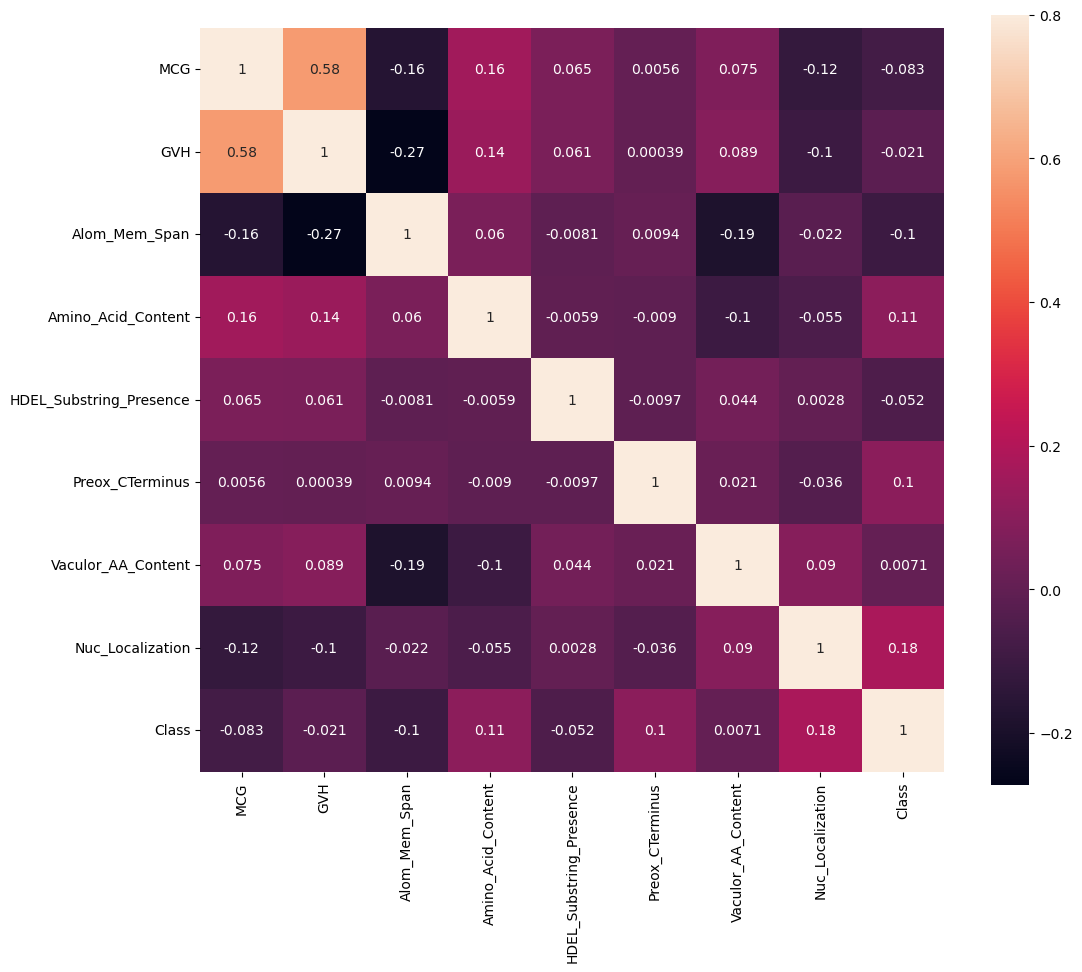

In [13]:
# A correlation plot of the values
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, annot=True, square=True)

A look at the distribution of the MCG and GVH, which were both weakly negatively correlated, and the Nuc Localizaion, which was weakly possitively correlated.

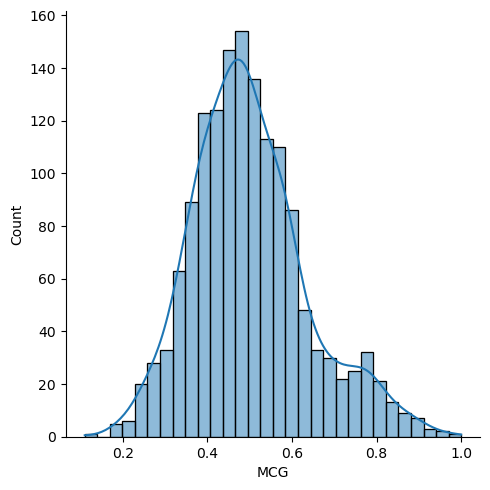

In [14]:
sns.displot(df.MCG, kde=True)

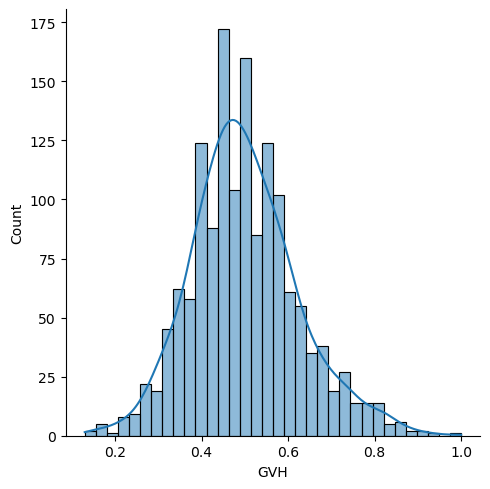

In [15]:
sns.displot(df.GVH, kde=True)

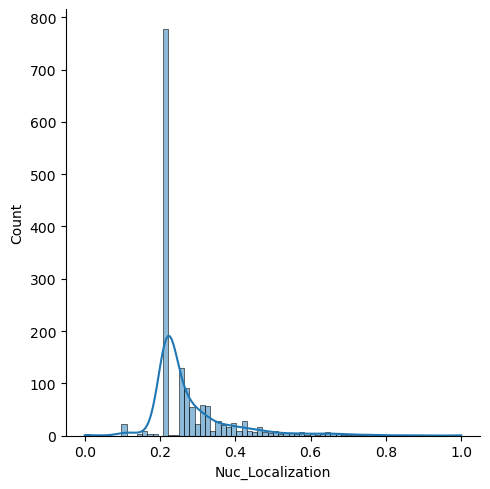

In [16]:

sns.displot(df['Nuc_Localization'], kde=True)

Checking to see if the Nuc Localization is normally distributed

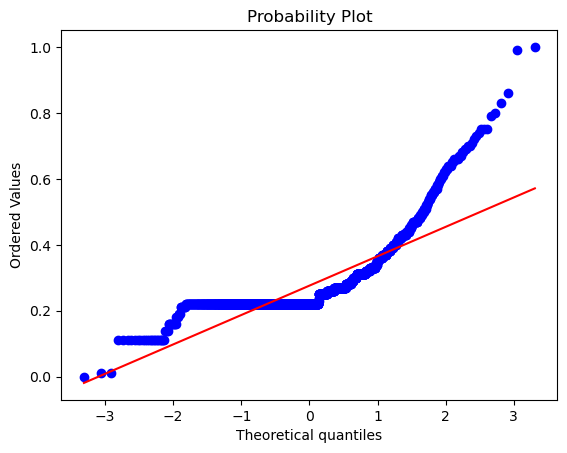

In [17]:
import scipy.stats as stats # loading in library
res = stats.probplot(df['Nuc_Localization'], plot=plt)

Looking at the correlation plot the dataset does not appear all that promising, there are no values that are strongly correlated to the Class. There is some correlation (0.58) between MCG and GVH. These are two different methods for determining signal sequence recognition. It would make sense that there two values are somewhat related if they are reporting a similar feature.

In addition, the one feature that does has the greatest correlation, Nuclear Localization, is not normally distributed.

Their are currently 10 classes of proteins, which it too many to look at using a logistic regression model. The data is goint to be paired down to contain just the highest two Class counts (shown below) which are Class 0 and Class 7, the other classes will be removed from the data set before models are evaluated.

In [18]:
df.groupby('Class').count()

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization
Class,,,,,,,,
0,463,463,463,463,463,463,463,463
1,5,5,5,5,5,5,5,5
2,35,35,35,35,35,35,35,35
3,44,44,44,44,44,44,44,44
4,51,51,51,51,51,51,51,51
5,163,163,163,163,163,163,163,163
6,244,244,244,244,244,244,244,244
7,429,429,429,429,429,429,429,429
8,20,20,20,20,20,20,20,20


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MCG                      1484 non-null   float64
 1   GVH                      1484 non-null   float64
 2   Alom_Mem_Span            1484 non-null   float64
 3   Amino_Acid_Content       1484 non-null   float64
 4   HDEL_Substring_Presence  1484 non-null   float64
 5   Preox_CTerminus          1484 non-null   float64
 6   Vaculor_AA_Content       1484 non-null   float64
 7   Nuc_Localization         1484 non-null   float64
 8   Class                    1484 non-null   int8   
dtypes: float64(8), int8(1)
memory usage: 105.8+ KB


In [20]:
# Creating the new data frame that has just Class 0 and Class 7
zero_df = df.loc[(df['Class'] == 0 )]
seven_df = df.loc[(df['Class'] == 7 )]
small_df = pd.concat([zero_df, seven_df])
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, AATC_YEAST to ZUO1_YEAST
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MCG                      892 non-null    float64
 1   GVH                      892 non-null    float64
 2   Alom_Mem_Span            892 non-null    float64
 3   Amino_Acid_Content       892 non-null    float64
 4   HDEL_Substring_Presence  892 non-null    float64
 5   Preox_CTerminus          892 non-null    float64
 6   Vaculor_AA_Content       892 non-null    float64
 7   Nuc_Localization         892 non-null    float64
 8   Class                    892 non-null    int8   
dtypes: float64(8), int8(1)
memory usage: 63.6+ KB


The Class values must be between 0 and 1 to work correctly in a model, so those will be changed below

In [21]:
# Showing the 7 values
small_df.tail(2)

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization,Class
Sequence Name,,,,,,,,,
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,7
ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,7


In [22]:
# Changing the number 7 to 1
small_df['Class'] = small_df['Class'].apply(lambda x: str(x).replace('7', '1'))
small_df.tail()

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization,Class
Sequence Name,,,,,,,,,
YKY8_YEAST,0.25,0.40,0.52,0.15,0.5,0.0,0.56,0.28,1
YK44_YEAST,0.58,0.56,0.38,0.39,0.5,0.0,0.54,0.57,1
YOX1_YEAST,0.59,0.67,0.54,0.19,0.5,0.0,0.48,0.60,1
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,1


In [23]:
# Changing the Class back to an int
small_df['Class'] = small_df['Class'].astype(str).astype(int)
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, AATC_YEAST to ZUO1_YEAST
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MCG                      892 non-null    float64
 1   GVH                      892 non-null    float64
 2   Alom_Mem_Span            892 non-null    float64
 3   Amino_Acid_Content       892 non-null    float64
 4   HDEL_Substring_Presence  892 non-null    float64
 5   Preox_CTerminus          892 non-null    float64
 6   Vaculor_AA_Content       892 non-null    float64
 7   Nuc_Localization         892 non-null    float64
 8   Class                    892 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 66.2+ KB


A correlation plot of the smaller data frame

<Axes: >

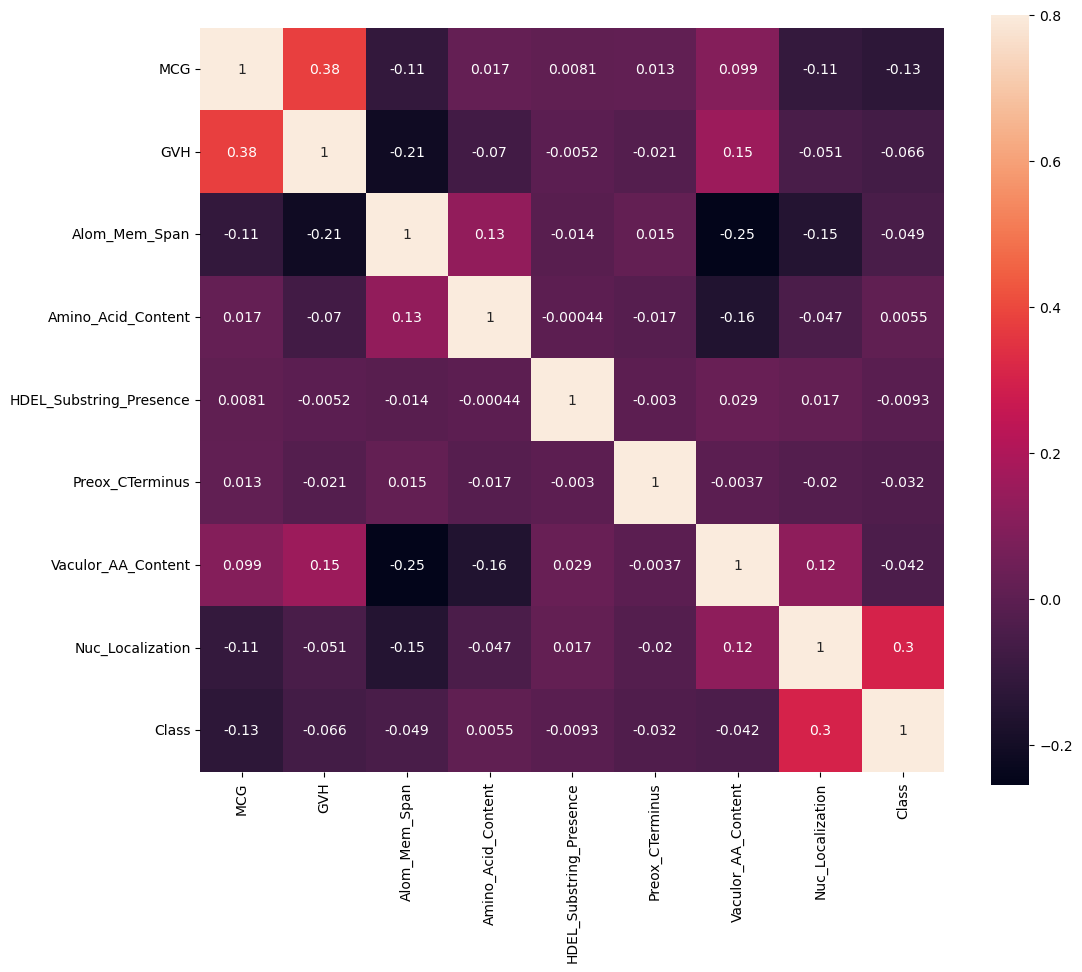

In [24]:
# A correlation plot of the values
corrmat = small_df.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, annot=True, square=True)

Taking another look at the distribution of the Nuclear Localizationm it is not linear and instead show a sigmoidal shape.

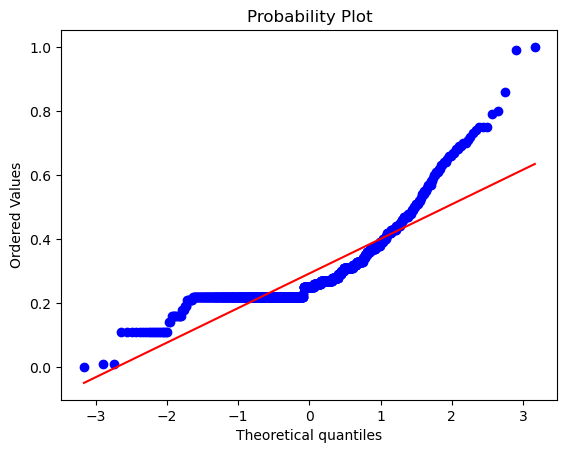

In [25]:
import scipy.stats as stats # loading in library
res = stats.probplot(small_df['Nuc_Localization'], plot=plt)

Taking a look at the data in the form of a boxplot will allow for the mean, 50th percentile, and any outliers to be visually apparent.

First, a look at the entire dataset, before it was paired down. The visual is of the feature with the greatest correlation according to the correlation plot.

<Axes: xlabel='Class', ylabel='Nuc_Localization'>

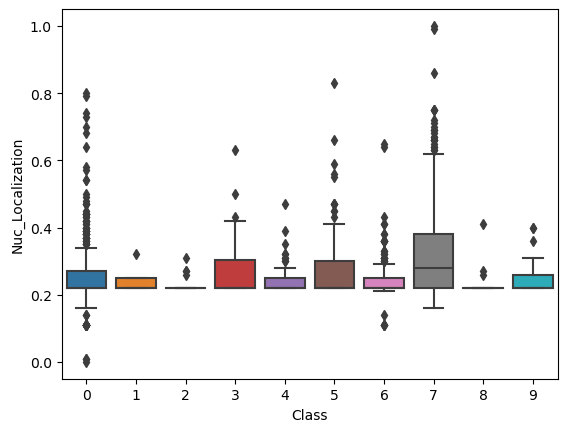

In [26]:
sns.boxplot(data=df, y="Nuc_Localization", x="Class")

Now a box plot of the smaller data set that has only two classes.

<Axes: xlabel='Class', ylabel='Nuc_Localization'>

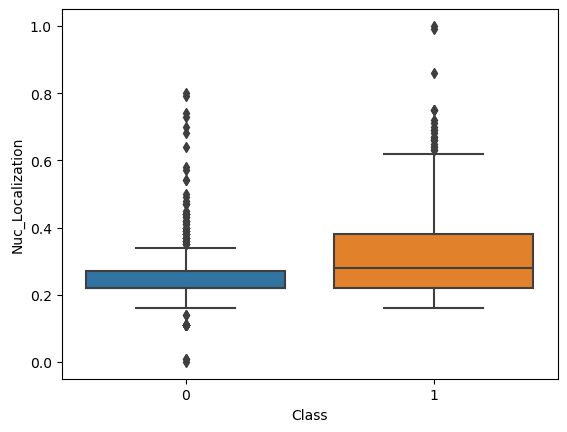

In [27]:
sns.boxplot(data=small_df, y="Nuc_Localization", x="Class")

A boxploto of the other two features that were discussed aboe, GVH and MCG

<Axes: xlabel='Class', ylabel='GVH'>

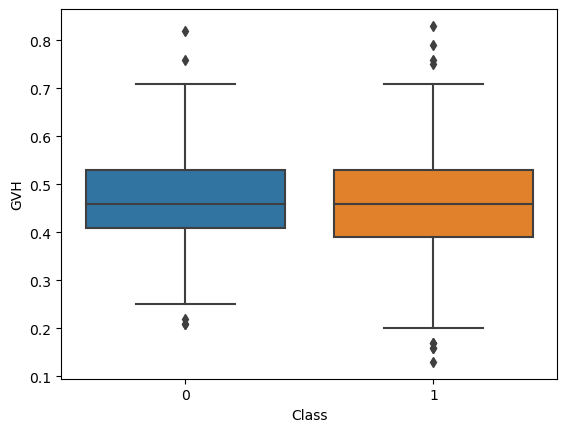

In [28]:
sns.boxplot(data=small_df, y="GVH", x="Class")

<Axes: xlabel='Class', ylabel='MCG'>

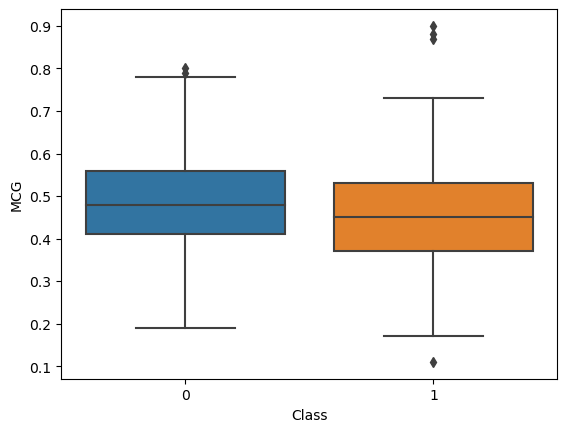

In [29]:
sns.boxplot(data=small_df, y="MCG", x="Class")

A look at one final feature, the Amino Acid Content. Amino acids are the backbone of proteins, and the idea in Biology is that the structure of the amino acid chain determines the function of the protein. Theoretically this would be a helpful feature, however, based on the below boxplot the feature may not have enough uniqueness between the two classes.

<Axes: xlabel='Class', ylabel='Amino_Acid_Content'>

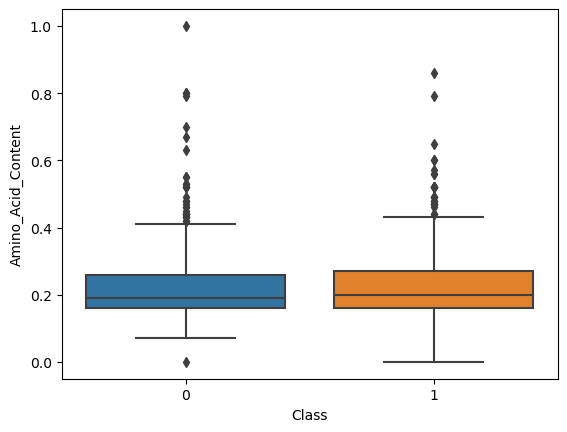

In [30]:
sns.boxplot(data=small_df, y="Amino_Acid_Content", x="Class")

The boxplots show that for the Nuclear Localization feature there are a lot of outliers in the upper quartile. Removing those outliers may improve the model and will be considered when the model is being tuned.

As for the GVH and MCG it is clear from the visualization that the features have very little difference between the two classes. The GVH boxplots in particular are almost identical to one another.

### Model 1) Logistic Regression (Binary Outcome Variable)

Logistic regression uses probablity of each element belonging to one of the two classes and then assigns into to the class with the highest probability.

This analysis was performed using the suggestions on the site https://stats.oarc.ucla.edu/stata/dae/logistic-regression/

Introduction to SAS. UCLA: Statistical Consulting Group. 
from https://stats.oarc.ucla.edu/sas/modules/introduction-to-the-features-of-sas/ (accessed June 10, 2023).

#### Train Test Split

Before continuing with model development the data set will be split 80/20 into a train and test set to use in evaluating the models predictions

In [31]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ['MCG', 'GVH', 'Alom_Mem_Span', 'Amino_Acid_Content', 
          'HDEL_Substring_Presence', 'Preox_CTerminus', 'Vaculor_AA_Content', 
          'Nuc_Localization']

X = small_df.loc[:, features]
y = small_df.loc[:, ["Class"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A Logistic Regression model from the Stats Models library will be used for the intial model.

In [32]:
import statsmodels.formula.api as smf

# formula for the model
form = 'Class ~ MCG + GVH + Alom_Mem_Span + Nuc_Localization + Amino_Acid_Content + HDEL_Substring_Presence + Preox_CTerminus + Vaculor_AA_Content'

# fitting the logistic regression model
py_logistic_smf = smf.logit(formula=form, data=small_df).fit()

print(py_logistic_smf.summary())

         Current function value: 0.631425
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  892
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                 0.08809
Time:                        12:17:12   Log-Likelihood:                -563.23
converged:                      False   LL-Null:                       -617.64
Covariance Type:            nonrobust   LLR p-value:                 6.665e-20
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.4800      1.383      1.070      0.285      -1.230       4.190
MCG                       

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


According to the above output all observations are being used in the model. The model failed to converge and will need to be tuned.

Next, the coefficents of the model can be used to exponentiate the odds of each variable

In [33]:
# getting coefficents
res_sm = pd.DataFrame(py_logistic_smf.params, columns=['coefs_sm'])

# calculate odds
res_sm['odds_sm'] = np.exp(res_sm['coefs_sm'])

# rounding
print(res_sm.round(3))

                         coefs_sm  odds_sm
Intercept                   1.480    4.393
MCG                        -1.752    0.173
GVH                        -0.329    0.720
Alom_Mem_Span              -1.309    0.270
Nuc_Localization            6.277  532.308
Amino_Acid_Content          0.240    1.271
HDEL_Substring_Presence    -0.697    0.498
Preox_CTerminus           -36.842    0.000
Vaculor_AA_Content         -2.797    0.061


The next step is to work on optomizing the model by changing which features are being used. Based on the coefficents it would be a good idea to drop out the lower scoring values such as Preox_CTerminues, MCG, Vaulor_AA_Content, Alom_Mem_SPan.

In [34]:
# formula for the model
form = 'Class ~ GVH + Nuc_Localization + HDEL_Substring_Presence + Amino_Acid_Content'

# fitting the logistic regression model
py_logistic_smf_2 = smf.logit(formula=form, data=small_df).fit()

print(py_logistic_smf_2.summary())

Optimization terminated successfully.
         Current function value: 0.638862
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  892
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            4
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                 0.07735
Time:                        12:17:12   Log-Likelihood:                -569.86
converged:                       True   LL-Null:                       -617.64
Covariance Type:            nonrobust   LLR p-value:                 8.709e-20
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.0265      0.920     -1.115      0.265      -2.830   

In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train.values.ravel())

y_pred = logistic_model.predict(X_test)

lraccuracy = accuracy_score(y_test,y_pred)*100

print("Accuracy is",lraccuracy)


Accuracy is 63.128491620111724


The model required 6 iterations to converge with a log likelihood of 0.638862

The Pseudo R-squared value is a measure of the "goodness of fit" for the model. The value is only 0.07735. Meaning that the model is not a very good fit.

## Model 2) Random Forst

A random forest uses a decission tree in which each branch is a random subest of the predictor values. The predictions are then aggregated and the best branches are kept and used in the model. The advantage of using a random forest is that it can handle a large set of input variables, provide an estimation of variable importance, and are resistant to overfitting the data.

Koehrsen, Will. “Random Forest in Python.” Medium, 17 Jan. 2018, towardsdatascience.com/random-forest-in-python-24d0893d51c0. (Accessed June 11, 2023).

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100)

# Train the random forest model
rf_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
rfaccuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", rfaccuracy)
print("Feature importance:", rf_model.feature_importances_)
print("Number of trees:", len(rf_model.estimators_))

Accuracy: 64.80446927374301
Feature importance: [0.17506061 0.1685194  0.15470294 0.15224026 0.00231519 0.00032244
 0.1398456  0.20699357]
Number of trees: 100


Using a Random Forest model resulted in a 64% accuracy for the model, slightly better than a 50/50 guess.

## Model 3) SVM Classifier

A Support-Vector-Machine classifier are used to find optimal decision boundaries between different classes in the input feature space. The idea is to find the plane that has the greatest seperation for the data points.

The SVM Classifier was designed and built using the help of ChatGPT3

*Title: Conversation with ChatGPT on linear and logistic regression

*Publisher: OpenAI

*Website: chat.openai.com

*Date: June 13, 2023

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
# Create an SVM classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
svmaccuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", svmaccuracy)
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

Accuracy: 66.4804469273743
Precision: 68.96551724137932


The SVM Model performed better than the random tree model on the same data set, with an accuracy of 66%.

## Model 4) Gradient Boosting Classifier

Gradient boosting models use machine learning to create a decission tree, see what mistakes it contains, correct the mistakes, and then create a new model. This procedure is performed over and over again. The final model takes into consideration all the intial models.

The model was developed while creating the SVM model with ChatGPT3

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = gb_model.predict(X_test)

# Calculate the accuracy of the model
gdbaccuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", gdbaccuracy)
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

Accuracy: 74.74747474747475
Precision: 77.15517241379311


Unfortunately the gradient boosting model did not perform better then the SVM model.

# Another Direction

The original dataset included multipled Classes of protein. In order to classify them the largest two classes were kept, and the rest were removed. Another option would be to keep one class, coded as 1, and then change all 7 of the other classes to 0. In which case you would be predicting if the protein is or is not off class 1. This might provide a bigger set of data to work with and a better model.

In [39]:
# Viewing the orginal data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MCG                      1484 non-null   float64
 1   GVH                      1484 non-null   float64
 2   Alom_Mem_Span            1484 non-null   float64
 3   Amino_Acid_Content       1484 non-null   float64
 4   HDEL_Substring_Presence  1484 non-null   float64
 5   Preox_CTerminus          1484 non-null   float64
 6   Vaculor_AA_Content       1484 non-null   float64
 7   Nuc_Localization         1484 non-null   float64
 8   Class                    1484 non-null   int8   
dtypes: float64(8), int8(1)
memory usage: 138.1+ KB


In [40]:
# Viewing the classes
df.groupby('Class').count()

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization
Class,,,,,,,,
0,463,463,463,463,463,463,463,463
1,5,5,5,5,5,5,5,5
2,35,35,35,35,35,35,35,35
3,44,44,44,44,44,44,44,44
4,51,51,51,51,51,51,51,51
5,163,163,163,163,163,163,163,163
6,244,244,244,244,244,244,244,244
7,429,429,429,429,429,429,429,429
8,20,20,20,20,20,20,20,20


Class 0 has the most proteins. All the others classes will be changed to "1" which will mean in this case "Not Class 0". Using the original information Class 0 are the CYT proteins.

In [41]:
# Changing all the other classes to class 1
df_new = df
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('2', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('3', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('4', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('5', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('6', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('7', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('8', '1'))
df_new['Class'] = df_new['Class'].apply(lambda x: str(x).replace('9', '1'))

df_new['Class'] = df_new['Class'].astype(str).astype(int)

df_new.groupby('Class').count()

,MCG,GVH,Alom_Mem_Span,Amino_Acid_Content,HDEL_Substring_Presence,Preox_CTerminus,Vaculor_AA_Content,Nuc_Localization
Class,,,,,,,,
0,463,463,463,463,463,463,463,463
1,1021,1021,1021,1021,1021,1021,1021,1021


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MCG                      1484 non-null   float64
 1   GVH                      1484 non-null   float64
 2   Alom_Mem_Span            1484 non-null   float64
 3   Amino_Acid_Content       1484 non-null   float64
 4   HDEL_Substring_Presence  1484 non-null   float64
 5   Preox_CTerminus          1484 non-null   float64
 6   Vaculor_AA_Content       1484 non-null   float64
 7   Nuc_Localization         1484 non-null   float64
 8   Class                    1484 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 142.4+ KB


Looking at a correlation plot of the new data as well as a boxplot of the strongest correlation, Amino_Acid_Content and GVH

<Axes: >

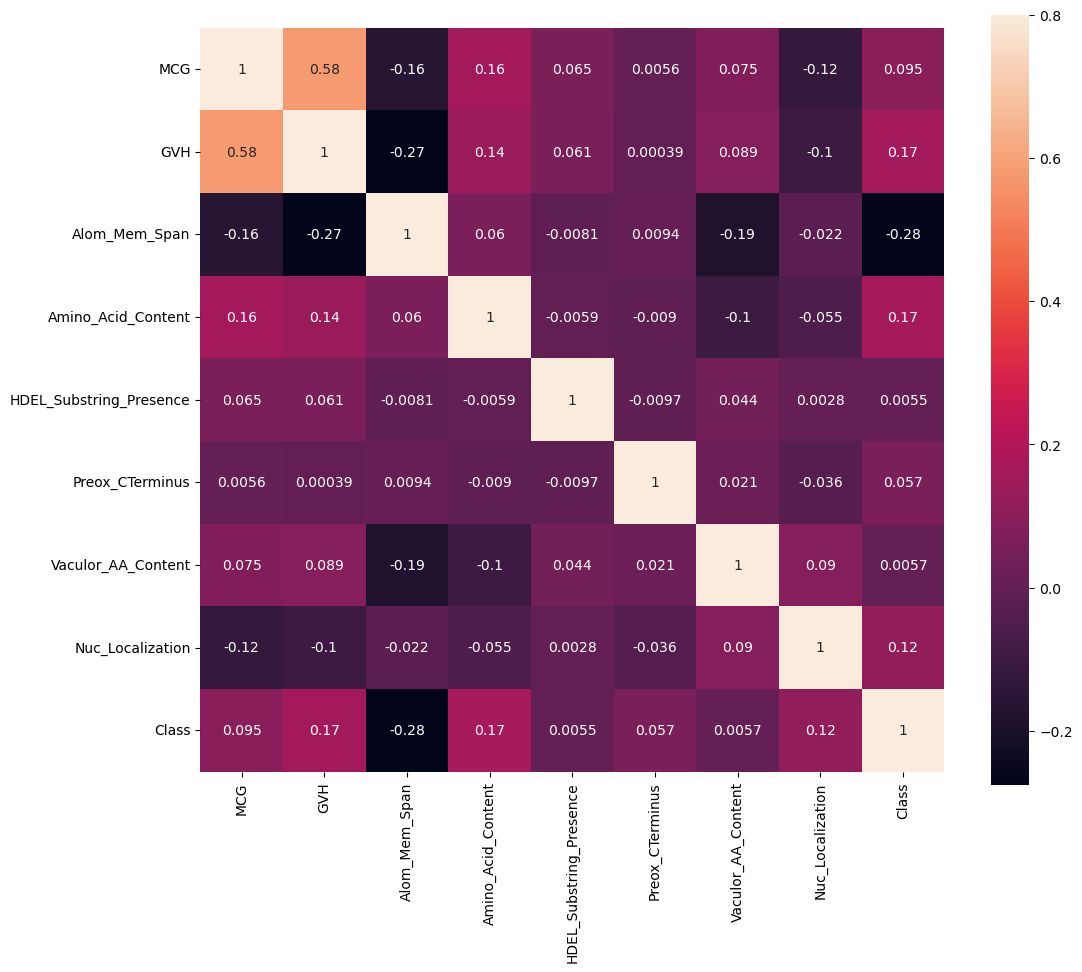

In [43]:
# A correlation plot of the values
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, annot=True, square=True)

<Axes: xlabel='Class', ylabel='Amino_Acid_Content'>

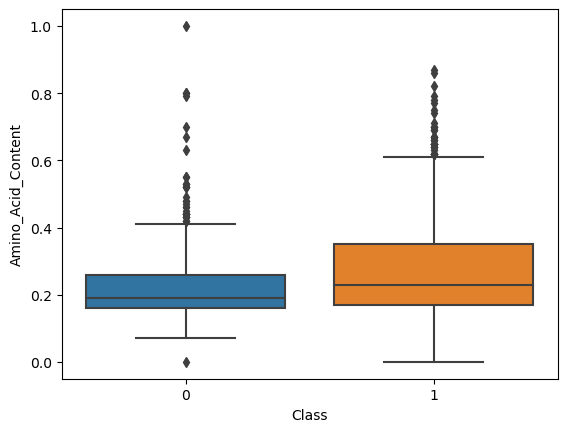

In [44]:
sns.boxplot(data=df_new, y="Amino_Acid_Content", x="Class")

<Axes: xlabel='Class', ylabel='GVH'>

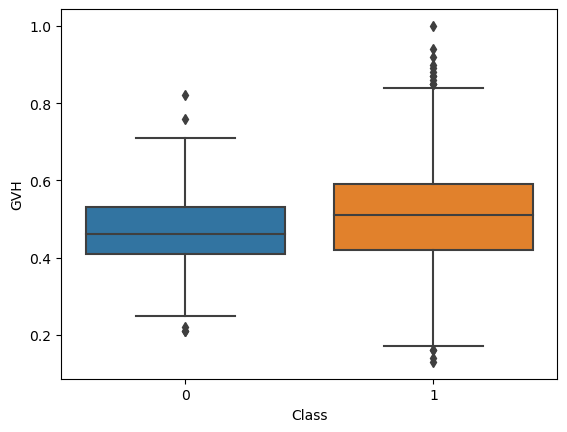

In [45]:
sns.boxplot(data=df_new, y="GVH", x="Class")

Creating a new train - test - split set of data

In [46]:
# Calling the train / test / split with the new data frame

features = ['MCG', 'GVH', 'Alom_Mem_Span', 'Amino_Acid_Content', 
          'HDEL_Substring_Presence', 'Preox_CTerminus', 'Vaculor_AA_Content', 
          'Nuc_Localization']

X = df_new.loc[:, features]
y = df_new.loc[:, ["Class"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



New Logistic Regression Model

In [47]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train.values.ravel())

y_pred = logistic_model.predict(X_test)

new_lraccuracy = accuracy_score(y_test,y_pred)*100

print("Accuracy is",new_lraccuracy)

Accuracy is 68.01346801346801


New Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier with 100 trees
new_rf_model = RandomForestClassifier(n_estimators=100)

# Train the random forest model
new_rf_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf2accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", rf2accuracy)
print("Feature importance:", new_rf_model.feature_importances_)
print("Number of trees:", len(new_rf_model.estimators_))

Accuracy: 78.11447811447812
Feature importance: [0.17176777 0.17738443 0.21198749 0.1690874  0.00250206 0.00509823
 0.13385666 0.12831597]
Number of trees: 100


New SVM Model

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
# Create an SVM classifier
new_svm_model = SVC()

# Train the SVM model
new_svm_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = new_svm_model.predict(X_test)

# Calculate the accuracy of the model
svm2accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", svm2accuracy)
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

Accuracy: 67.67676767676768
Precision: 67.67676767676768


New Gradient Boosting Model

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier
new_gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model
new_gb_model.fit(X_train, y_train.values.ravel())

# Predict the target variable for the test set
y_pred = new_gb_model.predict(X_test)

# Calculate the accuracy of the model
gdb2accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", gdb2accuracy)
precision = precision_score(y_test, y_pred)*100
print("Precision:", precision)

Accuracy: 74.74747474747475
Precision: 77.15517241379311


# Summary

A summary of the models is printed below:

In [51]:
print("LOGISTIC REGRESSION")
print("The Logistic Regression Accuracy: ", round(lraccuracy,2),"%")
print("Reviwed Logistic Regression Accuracy: ", round(new_lraccuracy,2),"%")
print("")
print("Random Forest")
print("Original Random Forest Model Accuracy: ", round(rfaccuracy,2),"%")
print("Revised Random Forest Model Accuracy: ", round(rf2accuracy,2),"%")
print("")
print("SVM Model")
print("Original SVM Model Accuracy: ", round(svmaccuracy,2),"%")
print("Revised SVM Model Accuracy: ", round(svm2accuracy,2),"%")
print("")
print("Gradiwn Boosting Model")
print("Original Gradient Boosting Model Accuracy: ", round(gdbaccuracy,2),"%")
print("Revised Gradient Boosting Model Accuracy: ", round(gdb2accuracy,2),"%")

LOGISTIC REGRESSION
The Logistic Regression Accuracy:  63.13 %
Reviwed Logistic Regression Accuracy:  68.01 %

Random Forest
Original Random Forest Model Accuracy:  64.8 %
Revised Random Forest Model Accuracy:  78.11 %

SVM Model
Original SVM Model Accuracy:  66.48 %
Revised SVM Model Accuracy:  67.68 %

Gradiwn Boosting Model
Original Gradient Boosting Model Accuracy:  60.89 %
Revised Gradient Boosting Model Accuracy:  74.75 %


# Summary

The goal in anlyzing the yeast dataset was to build a model that could predict protein binding based on a provided feature set. After the data was cleaned and labeled the two largest protein catagories were selected. The data was broken into a train and test set and then 5 models were compared, a Logistic Regression, Probability, Random Forest, SVM, and Gradient boosting model. The models were then assessed using the reserved test data set. Overall the Logistic Regression model scored the highest, with an accuracy of 68%.

After the initial model was developed that original data set was labeled a second time to compate CYT proteins to all other proteins. The goal was to provide the model with a greater amount of data. The revised data set was fed through the same models and the revised random forest model and proved to be the highest scoring model with 78.11% classification.

The orginal data set came with a data file that included the following excerpt:

    "Results: 55% for Yeast data with an ad hoc structured
	probability model. Also similar accuracy for Binary Decision Tree and
	Bayesian Classifier methods applied by the same authors in
	unpublished results."

The model was created in 1996. The newer methods that are available to computer scienetists today, such as random forests and gradient boosting, appear to be superior to the model that was used at the time. It may also be that picking just two proteins to classify resulted in the increase in model success.

### Copy of Conversation with ChatGPT3

#### Title: Conversation with ChatGPT on linear and logistic rddegression
#### Publisher: OpenAI
#### Website: chat.openai.com
#### Date: June 13, 2023

"

When you have 8 features and 8 different discrete variables to classify, you can consider using a classification algorithm that can handle multi-class problems. Here are a few models that can be suitable for your scenario:

    Multinomial Logistic Regression: Multinomial logistic regression extends binary logistic regression to handle multi-class classification. It models the relationship between the features and the probabilities of each discrete variable using a logistic function. Multinomial logistic regression is particularly useful when the classes are mutually exclusive and there is no natural ordering among them.

    Random Forest Classifier: Random forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle multi-class classification and is known for its ability to capture complex relationships between features and class labels. Random forests are robust, handle high-dimensional data well, and provide importance measures for features.

    Support Vector Machines (SVMs): SVMs can be adapted to handle multi-class classification by using techniques like one-vs-one or one-vs-all. SVMs construct hyperplanes that separate the different classes in the feature space. They work well when the number of features is relatively high, and they can capture complex relationships.

    Gradient Boosting Classifier: Gradient boosting classifiers, such as XGBoost or LightGBM, are powerful algorithms that can handle multi-class classification effectively. They iteratively build an ensemble of weak models (typically decision trees) that sequentially correct the errors of the previous models. Gradient boosting algorithms are known for their high predictive accuracy and ability to handle complex datasets.

    Neural Networks: Deep learning models, specifically neural networks, can handle multi-class classification tasks. By designing an appropriate architecture, such as a fully connected neural network or a convolutional neural network (CNN), you can train the model to learn complex feature interactions and make predictions across the 8 different discrete variables.

The choice of the model depends on various factors such as the size and quality of the dataset, the nature of the features, the complexity of the relationships, and computational considerations. It is often useful to experiment with different models and evaluate their performance using appropriate metrics and cross-validation techniques to determine the best model for your specific task.

"